# Pruebas usando  funciones Excel archivo Bondes5.0.xlsm

In [55]:
def precio_bono(pzo, pzocupon, cupon, mkt, sobretasa, pzomkt, vnom=100):
    """
    Calcula el precio limpio de un bono.
    
    Entradas:
        pzo (int): Días a transcurrir desde fecha de interes hasta el último cupón.
        pzocupon (int): Días entre cupones. (28)
        cupon (float): Tasa de cupón. (corresponde al valor de CUPON ACTUAL del vector)
        mkt (float): Tasa de mercado???? esta en el excel en  Ayuda!D5 pero no se de donde sale ??????    
        sobretasa (float): Sobretasa.
        pzomkt (int): Plazo de mercado???
        vnom (float, optional): Valor nominal del bono. Por defecto es 100.
    
    Salidas:
        float: El precio limpio calculado.
    """
    if mkt == 0:
        return 0
    else:
        # Cálculo de las tasas
        # tmkt = (((1 + (mkt) * pzomkt / 360) ^ (pzocupon / pzomkt) - 1) * 360 / pzocupon)
        tmkt = (((1 + mkt * pzomkt / 360) ** (pzocupon / pzomkt) - 1) * 360 / pzocupon)
        
        # tsmkt = ((1 + (mkt + sobretasa) * pzomkt / 360) ^ (pzocupon / pzomkt) - 1)
        tsmkt = ((1 + (mkt + sobretasa) * pzomkt / 360) ** (pzocupon / pzomkt) - 1)
        
        # Función para calcular el valor del cupón vigente
        def cupvig(pzo, pzocupon, cupon, mkt, vnom):
            # cupvig = vnom * ((1 + cupon * (pzocupon - (pzo Mod pzocupon)) / 360) * (1 + mkt / 360) ^ ((pzo Mod pzocupon)) - 1)
            return vnom * (((1 + cupon * (pzocupon - (pzo % pzocupon)) / 360) * (1 + mkt / 360)) ** (pzo % pzocupon) - 1)

        # Función para calcular el interés
        def inter(pzo, pzocupon, cupon, vnom):
            if (pzo % pzocupon) == 0:
                inter = 0
            else:
                #inter = ((pzocupon - (pzo Mod pzocupon)) * cupon / 360) * vnom
                inter = ((pzocupon - (pzo % pzocupon)) * cupon / 360) * vnom

            return inter
        #precio_bono = (cupvig(pzo, pzocupon, cupon, mkt) + (vnom * tmkt * pzocupon / 360) * (1 / tsmkt - 1 / (tsmkt * (1 + tsmkt) ^ (Int(pzo / pzocupon)))) + vnom / ((1 + tsmkt) ^ (Int(pzo / pzocupon)))) / ((1 + tsmkt) ^ (1 - (pzocupon - (pzo Mod pzocupon)) / pzocupon)) - inter(pzo, pzocupon, cupon)
        precio_bono = (cupvig(pzo, pzocupon, cupon, mkt, vnom) + (vnom * tmkt * pzocupon / 360) * (1 / tsmkt - 1 / (tsmkt * (1 + tsmkt) ** (int(pzo / pzocupon)))) + vnom / ((1 + tsmkt) ** (int(pzo / pzocupon)))) / ((1 + tsmkt) ** (1 - (pzocupon - (pzo % pzocupon)) / pzocupon)) - inter(pzo, pzocupon, cupon, vnom)
        
        return precio_bono

def comtasa(tasa, pzo, pzomkt):
    """
    Calcula una tasa de interés.
    Entrada:
        tasa (float): Tasa de interés pero no se cual 'CuponActual'????.
        pzo (int): Días transcurridos o dias entre cupones 'FrecCpn' ??.
        pzomkt (int): dias para liquidacion 1 a menos que existan dias inhabiles.
    Salida:
        float: La tasa de interés calculada.
        
    Function comtasa(tasa, pzo, pzomkt)
      comtasa = ((((1 + (tasa * pzomkt) / 360) ^ (pzo / pzomkt)) - 1) * 360 / pzo)
    End Function    
        
    """
    comtasa = ((((1 + (tasa * pzomkt) / 360) ** (pzo / pzomkt)) - 1) * 360 / pzo)
    return comtasa
    
pzo = 1078
pzocupon = 28 
tasacupon = 0.1125
Tasa_mkt_ld = 0.1125
sobretasa = 0.00197943429548229
pzomkt = 1
vnom = 100

precio = precio_bono(pzo, pzocupon, tasacupon, Tasa_mkt_ld, sobretasa, pzomkt,vnom)
    
print(f"Valor calulado {precio}, valor esperado {99.496116}")


Valor calulado 105.3604298856119, valor esperado 99.496116


In [10]:

def reg_tasa(pzo, pzocupon, cupon, mkt,pzomkt , precio_objetivo):
    """
    Calcula la tasa de interés necesaria para que el precio de un bono sea igual al precio objetivo.

    Args:
        pzo (int): Días a transcurrir desde fecha interes (spot) y vencimiento de ultimo cupon.
        pzocupon (int): Días entre cupones.
        cupon (float): Tasa de cupón?????? No es lo que se tiene calcular?
        mkt (float): Tasa de mercado, no se de donde sale???
        precio_objetivo (float): Precio objetivo al que se desea que el bono alcance.
        pzomkt: se obtiene de la fecha de interes sumando 1 o mas dias depndende de dias inahbiles

    Returns:
        float: La tasa de interés calculada.
    """
    if precio_objetivo == 0:
        return 0
    else:
        # Se asume una tasa de sobretasa inicial de 0.
        sobretasa = 0

        # Se calcula el precio resultante con la tasa de sobretasa inicial.
        precio_resultante = precio_bono(pzo, pzocupon, cupon, mkt, sobretasa, pzomkt)

        # Se calcula la diferencia entre el precio objetivo y el precio resultante.
        diferencia = precio_objetivo - precio_resultante

        cuenta = 0  # Contador de iteraciones.

        # Se inicia un bucle mientras la diferencia sea significativa o no se alcance el límite de iteraciones.
        while (diferencia > 0.0000001 or diferencia < -0.0000001):
            # Se calcula un nuevo valor de sobretasa para ajustar la diferencia.
            novo = diferencia / pzo * 360 / 100
            sobretasa = sobretasa - novo

            # Se recalcula el precio resultante con la nueva sobretasa.
            precio_resultante = precio_bono(pzo, pzocupon, cupon, mkt, sobretasa, pzomkt)

            # Se actualiza la diferencia.
            diferencia = precio_objetivo - precio_resultante

            # Se incrementa el contador de iteraciones.
            cuenta = cuenta + 1

            # Se verifica si se ha alcanzado un límite de iteraciones para evitar bucles infinitos.
            if cuenta > 10:
                break

        # El resultado final es la tasa de sobretasa que hace que el precio sea igual al precio objetivo.
        reg_tasa = sobretasa

        return reg_tasa
    
# si no funiciona el anterio del precio menos funcionara esto
pzo = 1078
pzocupon = 28 
tasacupon = 0.1125
Tasa_mkt_ld = 0.1125
pzomkt = 1
vnom = 100
precio_objetivo = 99.496116
    
calculado_reg_tasa= reg_tasa(pzo, pzocupon, tasacupon, Tasa_mkt_ld,pzomkt , precio_objetivo)

print(f" Cálculo de Tasa / Sobretasa :{calculado_reg_tasa},esperado sobretasa: {0.1979}%  ")

 Cálculo de Tasa / Sobretasa :0.025846904658107125,esperado: 0.1979%  


# Revision de fechas y dias para calculos

In [1]:
from LD_BONDES_D import LD_BondesD
from datetime import datetime, date , timedelta
import pandas as pd
import numpy as np 


def series():
    df_vectorInvex = pd.read_excel("info_Bonos\\20230831_t-1_Vector_LD.xlsx")
    return list(df_vectorInvex['Serie'])


def cargarInfoBono(num_serie,archivo = "info_Bonos\\20230831_t-1_Vector_LD.xlsx"):
    df_vectorInvex = pd.read_excel(archivo)
    serie = [ x for x in ['Serie','SERIE'] if x in df_vectorInvex.columns ][0]
    bono_analizar = df_vectorInvex[df_vectorInvex[serie] == num_serie].reset_index(drop=True)
    info_bono_analizar = {}
    for key in bono_analizar.columns:
        val = bono_analizar.loc[0,key]
        info_bono_analizar[key] = val 
    return info_bono_analizar


for num_serie in series():
    infoBono = cargarInfoBono(num_serie)
    BonoEnEvaluacion = LD_BondesD(infoBono)
    Fcupon0 = BonoEnEvaluacion.calcular_fechas_cupon()[0]
    Fcupon1 = BonoEnEvaluacion.calcular_fechas_cupon()[1]
    FcuponN = BonoEnEvaluacion.calcular_fechas_cupon()[-1]
    Finteres = BonoEnEvaluacion.verInfoBono()['TimId']
    CupResVect = BonoEnEvaluacion.verInfoBono()['CuponesCobrar']
    CupResCalc =BonoEnEvaluacion.Num_cupones_por_liquidar()
    
    dcalc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
    dvector = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn']
    
    if dcalc ==0 or dvector == 0:
        Fcupon_0 = BonoEnEvaluacion.verInfoBono()['TimId']
        Fcupon_1 = BonoEnEvaluacion.verInfoBono()['TimId'] - timedelta(days=1)
    else:
        Fcupon_0 = BonoEnEvaluacion.calcular_fechas_ultimo_cupon()[0]  
        Fcupon_1 = BonoEnEvaluacion.calcular_fechas_ultimo_cupon()[-1]
    
    #if dvector != dcalc:
    print(f"Revision fecha cupon serie:{num_serie} ")
    print(f"Cupones restantes por cobrar segun vector : {CupResVect}, calculado:{CupResCalc}") 
    print(f"ultimo cupon cobrado:{Fcupon0}, fecha interes:{Finteres}, proximo cupon: {Fcupon1}, ultimo cupon: {FcuponN}")
    print(f"Revision dias desde ultimo cupon")
    print(f"d_calc={dcalc},DiasTranscCpn={dvector} ")
    print(f"Fecha de ultimo cupon :{Fcupon_0} ...... Fecha 1 dia antes fecha interes:{Fcupon_1}  ")
    print(f"{[ str(x) for x in BonoEnEvaluacion.calcular_fechas_ultimo_cupon()]}")
    print() 

Revision fecha cupon serie:231005 
Cupones restantes por cobrar segun vector : 2, calculado:2
ultimo cupon cobrado:2023-08-10, fecha interes:2023-08-31, proximo cupon: 2023-09-07, ultimo cupon: 2023-10-05
Revision dias desde ultimo cupon
d_calc=21,DiasTranscCpn=21 
Fecha de ultimo cupon :2023-08-10 ...... Fecha 1 dia antes fecha interes:2023-08-30  
['2023-08-10', '2023-08-11', '2023-08-12', '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29', '2023-08-30']

Revision fecha cupon serie:231101 
Cupones restantes por cobrar segun vector : 3, calculado:3
ultimo cupon cobrado:2023-08-09, fecha interes:2023-08-31, proximo cupon: 2023-09-06, ultimo cupon: 2023-11-01
Revision dias desde ultimo cupon
d_calc=22,DiasTranscCpn=21 
Fecha de ultimo cupon :2023-08-09 ...... Fecha 1 dia antes fecha interes:2023-08-30  


### Lo importante de las fechas es calcular TCdev

![Imagen](imagenes\LD_BondesD_TCdev.png)

## Encontrando los valores de ri para cada fecha

In [2]:
# De la pagina :
# https://www.banxico.org.mx/SieInternet/consultarDirectorioInternetAction.do?sector=18&accion=consultarCuadroAnalitico&idCuadro=CA52&locale=es

#Se descargo el archivo:
#Consulta_20230915-130037169.xlsx
# Se construyo df_tabla_ri_14_09_2023.csv
import pandas as pd
from datetime import datetime, date , timedelta

df_tabla_ri = pd.read_csv(r"info_Bonos\\df_tabla_ri_14_09_2023.csv")

def hallar_tabla_ri_fechas(fechas,df_tabla_ri,fechaInc,FrecCpn=28):
    """
    Encuentra los ri para cada 'Fecha' de la lista fechas 
    en el DataFrame 'df_tabla_ri' en la columna 'Fecha'.
    Si la 'Fecha' no se encuentra, busca en 'df_tabla_ri' la fecha 
    más cercana y devuelve ri.
    Args:
        fechas [list (pandas._libs.tslibs.timestamps.Timestamp)]: fechas a encontrar.
        df_tabla_ri (pd.DataFrame): El DataFrame que contiene los datos.
    Returns:
        ri: lista con los valores de ri para las fechas    """
    
    def Encuentra_ri_fecha(Fecha, df_tabla_ri):
        """
        Encuentra ri para la fecha 
        Args:
            Fecha (pandas._libs.tslibs.timestamps.Timestamp): La fecha a encontrar.
            df_tabla_ri (pd.DataFrame): El DataFrame que contiene los datos.
        Returns:
            ri para fecha
        """
        # Asegurar'Fecha' sea de tipo datetime
        df_tabla_ri['Fecha'] = pd.to_datetime(df_tabla_ri['Fecha'])

        # Ordenar el DataFrame por la columna 'Fecha' para facilitar la búsqueda
        df_tabla_ri = df_tabla_ri.sort_values(by='Fecha')

        # Intentar encontrar la fecha exacta
        exact_match = df_tabla_ri[df_tabla_ri['Fecha'] == Fecha]

        if not exact_match.empty:
            # Si se encuentra una coincidencia exacta, devolverla
            fecha = exact_match.iloc[0]['Fecha']
        else:
            # Si no se encuentra una coincidencia exacta, 
            # buscar la fecha más cercana anterior a 'Fecha'
            fecha = df_tabla_ri[df_tabla_ri['Fecha'] < Fecha].iloc[-1]['Fecha']
            
        ri = float(df_tabla_ri[df_tabla_ri['Fecha'] == fecha]['ri'])
        return ri
    
    # si no hay fechas, el ri no es vacio, sino por el contrario se colocan todos los ri para
    # el calculo de la TC del ultimo cupon.
    if not fechas:
        fechas = [fechaInc - timedelta(days=i+1) for i in range(FrecCpn)]
    
    ri = []
    for fecha in fechas:
        fecha = pd.to_datetime(fecha)
        ri.append(Encuentra_ri_fecha(fecha, df_tabla_ri)) 
    return ri


In [3]:
from LD_BONDES_D import LD_BondesD
from datetime import datetime, date , timedelta
import pandas as pd
import numpy as np 

def series():
    df_vectorInvex = pd.read_excel("info_Bonos\\20230831_t-1_Vector_LD.xlsx")
    return list(df_vectorInvex['Serie'])

def cargarInfoBono(num_serie,archivo = "info_Bonos\\20230831_t-1_Vector_LD.xlsx"):
    df_vectorInvex = pd.read_excel(archivo)
    serie = [ x for x in ['Serie','SERIE'] if x in df_vectorInvex.columns ][0]
    bono_analizar = df_vectorInvex[df_vectorInvex[serie] == num_serie].reset_index(drop=True)
    info_bono_analizar = {}
    for key in bono_analizar.columns:
        val = bono_analizar.loc[0,key]
        info_bono_analizar[key] = val 
    return info_bono_analizar

df_tabla_ri = pd.read_csv(r"info_Bonos\\df_tabla_ri_14_09_2023.csv")


for num_serie in series():
    infoBono = cargarInfoBono(num_serie)
    BonoEnEvaluacion = LD_BondesD(infoBono)
    
    Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon()
    FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn']
    fechaInc = BonoEnEvaluacion.verInfoBono()['TimId']
    
    tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,fechaInc,FrecCpn)

    print(f"ri para fechas desde ultimo cupon hasta dia interes -1 serie:{num_serie} ")
    print(f"{[ str(x) for x in Fechas]}")
    print(f"{tabla_ri}") 
    

ri para fechas desde ultimo cupon hasta dia interes -1 serie:231005 
['2023-08-10', '2023-08-11', '2023-08-12', '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29', '2023-08-30']
[11.26, 11.28, 11.28, 11.28, 11.26, 11.25, 11.25, 11.2, 11.22, 11.22, 11.22, 11.23, 11.25, 11.26, 11.23, 11.25, 11.25, 11.25, 11.23, 11.24, 11.25]
ri para fechas desde ultimo cupon hasta dia interes -1 serie:231101 
['2023-08-09', '2023-08-10', '2023-08-11', '2023-08-12', '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17', '2023-08-18', '2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22', '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-26', '2023-08-27', '2023-08-28', '2023-08-29', '2023-08-30']
[11.26, 11.26, 11.28, 11.28, 11.28, 11.26, 11.25, 11.25, 11.2, 11.22, 11.22, 11.22, 11.23, 11.25, 11.26, 11.23,

### Encontrando TCdev

In [4]:
def calcTCdev(ri):
    """
    Tasa de interés anual devengada
    Entradas:
        ri =  vector con la tasa de interes diaria para los dias del 
        periodo en analisis
    Salida:
        TCdev: (float) Tasa de interés anual devengada, expresada en porciento[%] 
        con redondeo a dos decimales.
    """
    diasAño = 360
    ri = np.array(ri)
    d = len(ri)
    TCdev = (np.prod(1 + ri / (diasAño*100))-1) * (diasAño*100)/d
    return round(float(TCdev),2)

for num_serie in series():
    infoBono = cargarInfoBono(num_serie)
    BonoEnEvaluacion = LD_BondesD(infoBono)
    Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
    FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn']
    FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
    tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)

    valorTCdev = calcTCdev(tabla_ri)
    CuponActual = BonoEnEvaluacion.verInfoBono()['CuponActual']
    dvector = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn']
    dcalc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
    print(f"TCdev para  serie:{num_serie} => {valorTCdev}, CuponActual vector = {CuponActual}, d_calc={dcalc} ")
print("Difieren cuando el dia de evaluacion corresponde al dia cupon")

TCdev para  serie:231005 => 11.28, CuponActual vector = 11.28, d_calc=21 
TCdev para  serie:231101 => 11.28, CuponActual vector = 11.28, d_calc=22 
TCdev para  serie:231207 => 11.26, CuponActual vector = 11.26, d_calc=14 
TCdev para  serie:231221 => 11.29, CuponActual vector = 11.25, d_calc=0 
TCdev para  serie:240201 => 11.26, CuponActual vector = 11.26, d_calc=14 
TCdev para  serie:240229 => 11.26, CuponActual vector = 11.26, d_calc=14 
TCdev para  serie:240404 => 11.25, CuponActual vector = 11.25, d_calc=7 
TCdev para  serie:240425 => 11.26, CuponActual vector = 11.26, d_calc=14 
TCdev para  serie:240530 => 11.25, CuponActual vector = 11.25, d_calc=7 
TCdev para  serie:240627 => 11.25, CuponActual vector = 11.25, d_calc=7 
TCdev para  serie:240801 => 11.29, CuponActual vector = 11.25, d_calc=0 
TCdev para  serie:240822 => 11.25, CuponActual vector = 11.25, d_calc=7 
TCdev para  serie:241024 => 11.29, CuponActual vector = 11.25, d_calc=0 
TCdev para  serie:241219 => 11.29, CuponActua

### Calculando el interes devengado

In [5]:
def calcInteres(TCj,Nj,VN):
    """
    Intereses se calculan considerando los días efectivamente transcurridos entre las
    fechas de pago de los mismos, tomando como base años de 360 días, y se liquidan al
    finalizar cada uno de los períodos de interés
    entrada:
        - TCJ(float) = Tasa de interés anual del cupón J para el periodo Nj, expresada en términos porcentuales [%] con
                redondeo a dos decimales.
        - Nj (int): Número de días en período de cupón.
        - VN (float,): Valor nominal del bono. Valor por defecto: 100.
    Salida:
        Ij(Float) = Intereses por pagar al final del periodo J.
    """
    
    diasAño = 360
    Ij = VN*Nj*TCj/(diasAño*100)
    return Ij


for num_serie in series():
    infoBono = cargarInfoBono(num_serie)
    BonoEnEvaluacion = LD_BondesD(infoBono)
    Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
    FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn']
    FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
    tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)
    valorTCdev = calcTCdev(tabla_ri)
    
    VN = BonoEnEvaluacion.verInfoBono()['ValorNominal']
    dcalc = BonoEnEvaluacion.calcular_dias_ultimo_cupon() 
    dvector = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn']
    Idev = calcInteres(valorTCdev,dcalc,VN)
    
    InteresesAcumulados_vector = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados']
    
    print(f"Serie:{num_serie} => Idev = {Idev:.6f}, InteresesAcumulados vector = {InteresesAcumulados_vector},  {dcalc},{dvector} ")
print("Difieren cuando los dias calculados son diferentes a los dias del vector ")    
print("LA DIFERENCIA AFECTARA EL CALCULO DEL PRECIO SUCIO QUE ES PrecioLimpio + Idev") 

Serie:231005 => Idev = 0.658000, InteresesAcumulados vector = 0.658,  21,21 
Serie:231101 => Idev = 0.689333, InteresesAcumulados vector = 0.658,  22,21 
Serie:231207 => Idev = 0.437889, InteresesAcumulados vector = 0.437889,  14,14 
Serie:231221 => Idev = 0.000000, InteresesAcumulados vector = 0.0,  0,0 
Serie:240201 => Idev = 0.437889, InteresesAcumulados vector = 0.437889,  14,14 
Serie:240229 => Idev = 0.437889, InteresesAcumulados vector = 0.437889,  14,14 
Serie:240404 => Idev = 0.218750, InteresesAcumulados vector = 0.21875,  7,7 
Serie:240425 => Idev = 0.437889, InteresesAcumulados vector = 0.437889,  14,14 
Serie:240530 => Idev = 0.218750, InteresesAcumulados vector = 0.21875,  7,7 
Serie:240627 => Idev = 0.218750, InteresesAcumulados vector = 0.21875,  7,7 
Serie:240801 => Idev = 0.000000, InteresesAcumulados vector = 0.0,  0,0 
Serie:240822 => Idev = 0.218750, InteresesAcumulados vector = 0.21875,  7,7 
Serie:241024 => Idev = 0.000000, InteresesAcumulados vector = 0.0,  0,0 

## Calculando el Precio Limpio

In [6]:
def calcPrecioLimpio(r,s,TCdev,Idev,d,K,VN,Nj):
    """   Calcula el precio limpio de un bono a tasa fija.
    
        Entradas:
            - r (float): Rendimiento anual esperado por el inversionista expresada en porciento[%]. En vector'TasaDeRendimiento'
            - s (float): Sobretasa expresada en porciento[%] con redondeo dos decimales. En vector 'Sobretasa'
            - TCdev (float): Tasa de interés anual devengada, expresada en porciento[% ]con redondeo dos decimales. En vector 'CuponActual'
            - Idev (float) : Interes devengado en el periodo d. 
            - d (int): Número de días transcurridos del cupón vigente, vector 'DiasTranscCpn'
            - K (int): Número de cupones por liquidar, incluyendo el vigente, vector 'CuponesCobrar'
            - VN (int): Valor nominal del bono. Valor por defecto: 100. Vector: 'ValorNominal'
            - Nj (int): Número de días en cada período de cupón.  Vector: 'FrecCpn'
    """
    
    def CalcTC1(r,TCdev,d,Nj,diasAño):
        #Tasa anual esperada para el siguiente pago de intereses
        term1 = (1 + TCdev*d/(diasAño*100))
        term2 = (1+ r/(diasAño*100))**(Nj-d)
        #return round((term1 * term2 - 1) * (diasAño*100 / Nj),2)
        return (term1 * term2 - 1) * (diasAño*100 / Nj)
    
    def CalcTC(r,Nj,diasAño):
        #Tasa anual esperada para los pagos de intereses 2,3,…,K
        term1 = ( 1 + r/(diasAño*100))**Nj - 1 
        #return round(term1*diasAño*100/Nj,2)
        return term1*diasAño*100/Nj
    
    def calcular_Cj(TCj, VN, Nj ,diasAño):
        # Monto esperado del pago de intereses para el periodo j 
        return VN * Nj * TCj / (diasAño*100)
    
    def calcular_R(r,s,Nj,diasAño):
        #return round((1+(r+s)/(diasAño*100))**Nj-1,4)
        return (1+(r+s)/(diasAño*100))**Nj-1
    
    def calcular_precio_simple(C,C1,R, K, d,Idev,VN,Nj):
        """ 
        Cálculo del precio limpio de un bono a tasa fija según la fórmula (2) del APÉNDICE 2A
        Descripción técnica de los BONOS de desarrollo del gobierno federal con tasa de interés fija.
        """
        term1 = C * ( 1/R - 1/(R * ((1 + R)**(K - 1))))
        term2 = VN /((1 + R)**(K - 1))
        den = (1+R)**(1-d/Nj)
        P = (C1 + term1 + term2) / den - Idev
        return P
        
    diasAño = 360

    TC = CalcTC(r,Nj,diasAño)

    TC1 = CalcTC1(r,TCdev,d,Nj,diasAño)

    C = calcular_Cj(TC,VN,Nj,diasAño)

    C1 = calcular_Cj(TC1,VN,Nj,diasAño)

    R = calcular_R(r,s,Nj,diasAño) 
    
    #Revision detallada Ejemplo manual Banxico
    #print(f" r:{r:.3f},  s:{s:.3f},  TCdev:{TCdev:.2f},  Idev:{Idev:.5f} d:{d}, K:{K} ")
    #print(f" C1:{C1:.6f},  TC1:{TC1:.3f}, TC:{TC:.3f}, C:{C:.6f}, R:{R*100:.2f} ")
        
    PrecioLimpio = calcular_precio_simple(C,C1,R, K, d,Idev,VN,Nj)
    
    return PrecioLimpio  

In [7]:
# Ejemplo Norma
r = 7.06
s = 0.1 
TCdev = 7.04
Idev = 0.11733333 
d = 6
K = 13
VN = 100 
Nj = 28
print(f"Precio limpio calculado : {calcPrecioLimpio(r,s,TCdev,Idev,d,K,VN,Nj):.7} valor esperado es 99.88478 pero solo da cuando se redondea en el camino")

Precio limpio calculado : 99.90376 valor esperado es 99.88478 pero solo da cuando se redondea en el camino


In [8]:
import math
print("Precio Limpio utilizando datos vector")
for num_serie in series():
    infoBono = cargarInfoBono(num_serie)
    BonoEnEvaluacion = LD_BondesD(infoBono)
    
    #Valores vector: 
    r = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
    s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
    VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
    FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 
    TCdev_Vec = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
    Idev_Vec = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
    d_Vec = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
    K_Vec = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
    FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
    PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']
    
    PcalcVector= calcPrecioLimpio(r,s,TCdev_Vec,Idev_Vec,d_Vec,K_Vec,VN,FrecCpn) 
    ErrorPcalcVector = (PrecioLimpioVector-PcalcVector)/PrecioLimpioVector*100
    

    #  calculos propios:
    #TCdev e Idev usando Tabla fondeo (ri):
    Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
    tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)
    TCdev_Calc = calcTCdev(tabla_ri)
    d_Calc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
    Idev_Calc = calcInteres(TCdev_Calc,d_Calc,VN) 
    K_Calc = BonoEnEvaluacion.Num_cupones_por_liquidar()
    
    PrecioLimpioCalc= calcPrecioLimpio(r,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)
    ErrorPrecioLimpioCalc = (PrecioLimpioVector-PrecioLimpioCalc)/PrecioLimpioVector*100
    
    tol = 1e-12
    if not math.isclose(PrecioLimpioCalc, PcalcVector, rel_tol=tol, abs_tol=tol):
        print(f"Serie:{num_serie} Pvect = {PrecioLimpioVector:.6f},[({d_Vec}, {TCdev_Vec:.2f}, {Idev_Vec:.6f})=>(PcalcVector= {PcalcVector:.6f}, Error%= {ErrorPcalcVector:.6f})],[({d_Calc}, {TCdev_Calc:.2f}, {Idev_Calc:.6f})=>(PcalcPropios= {PrecioLimpioCalc:.6f}, Error%= {ErrorPrecioLimpioCalc:.6f})]")

Precio Limpio utilizando datos vector
Serie:231101 Pvect = 99.980859,[(21, 11.28, 0.658000)=>(PcalcVector= 99.980421, Error%= 0.000438)],[(22, 11.28, 0.689333)=>(PcalcPropios= 99.980730, Error%= 0.000129)]
Serie:231207 Pvect = 99.967020,[(14, 11.26, 0.437889)=>(PcalcVector= 99.967024, Error%= -0.000004)],[(14, 11.26, 0.437889)=>(PcalcPropios= 99.967024, Error%= -0.000004)]
Serie:240201 Pvect = 99.945070,[(14, 11.26, 0.437889)=>(PcalcVector= 99.945083, Error%= -0.000013)],[(14, 11.26, 0.437889)=>(PcalcPropios= 99.945083, Error%= -0.000013)]
Serie:240229 Pvect = 99.934875,[(14, 11.26, 0.437889)=>(PcalcVector= 99.934894, Error%= -0.000019)],[(14, 11.26, 0.437889)=>(PcalcPropios= 99.934894, Error%= -0.000019)]
Serie:240425 Pvect = 99.914296,[(14, 11.26, 0.437889)=>(PcalcVector= 99.914338, Error%= -0.000042)],[(14, 11.26, 0.437889)=>(PcalcPropios= 99.914338, Error%= -0.000042)]
Serie:250416 Pvect = 99.726052,[(21, 11.28, 0.658000)=>(PcalcVector= 99.725910, Error%= 0.000143)],[(22, 11.28, 0.

# Grafica precio limpio en funcion de rendimiento:

In [18]:
print(series())

[231005, 231101, 231207, 231221, 240201, 240229, 240404, 240425, 240530, 240627, 240801, 240822, 241024, 241219, 250220, 250416, 250619, 250814, 251016, 251211, 260212, 260409, 260611, 260806]


(Rendimiento vector:11.4455 PrecioLimpio Vector:99.552096)  , PCalcPropios:99.55316166878515 y PcalcVector 99.55316166878515


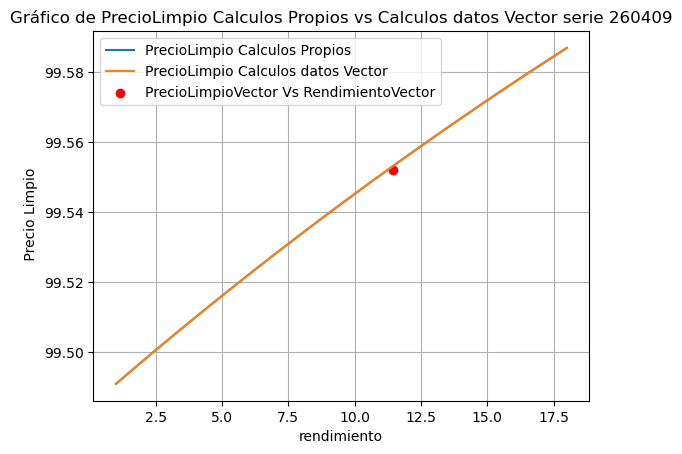

In [9]:
import numpy as np
import matplotlib.pyplot as plt

num_serie = np.random.choice(series()) #250416
infoBono = cargarInfoBono(num_serie)
BonoEnEvaluacion = LD_BondesD(infoBono)

#Valores vector: 
rvector = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 
TCdev_Vec = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
Idev_Vec = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
d_Vec = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
K_Vec = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']

#  calculos propios:
#TCdev e Idev usando Tabla fondeo (ri):
Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)
TCdev_Calc = calcTCdev(tabla_ri)
d_Calc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
Idev_Calc = calcInteres(TCdev_Calc,d_Calc,VN) 
K_Calc = BonoEnEvaluacion.Num_cupones_por_liquidar()

PCalcPropios= calcPrecioLimpio(rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)
PcalcVector= calcPrecioLimpio(rvector,s,TCdev_Vec,Idev_Vec,d_Vec,K_Vec,VN,FrecCpn) 



X_r = np.arange(1, 18, 0.01)
Y1_PCalcPropios = [calcPrecioLimpio(x,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)  for x in X_r]
Y2_PcalcVector =  [calcPrecioLimpio(x,s,TCdev_Vec,Idev_Vec,d_Vec,K_Vec,VN,FrecCpn)   for x in X_r]


print(f"(Rendimiento vector:{rvector} PrecioLimpio Vector:{PrecioLimpioVector})  , PCalcPropios:{PCalcPropios} y PcalcVector {PcalcVector}")

# Configurar el gráfico y las etiquetas
plt.figure()
plt.plot(X_r, Y1_PCalcPropios, label='PrecioLimpio Calculos Propios')
plt.plot(X_r, Y2_PcalcVector , label='PrecioLimpio Calculos datos Vector')
plt.scatter([rvector], [PrecioLimpioVector], c='red', marker='o', label='PrecioLimpioVector Vs RendimientoVector')
plt.xlabel('rendimiento')
plt.ylabel(' Precio Limpio')
plt.title(f'Gráfico de PrecioLimpio Calculos Propios vs Calculos datos Vector serie {num_serie}')
plt.grid()

# Agregar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

(Rendimiento vector:11.362502 PrecioLimpio Vector:99.980859) , segun grafica es 11.360000 o 11.360000 (PCalcPropios:99.980730  PcalcVector 99.980421)


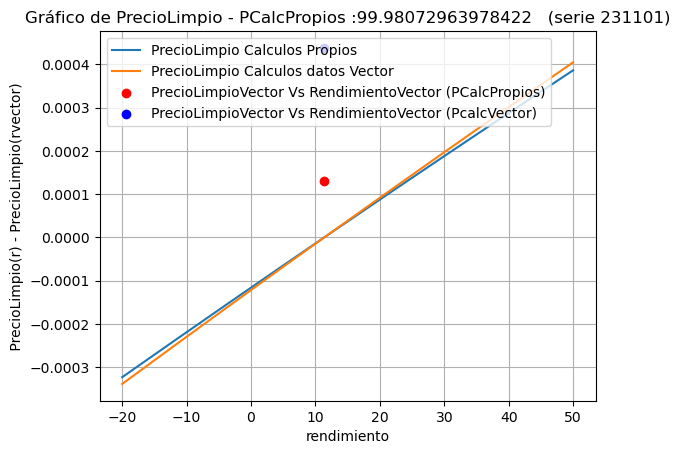

In [79]:
import numpy as np
import matplotlib.pyplot as plt

num_serie = 231101 #np.random.choice(series()) #250416 ,  231101
infoBono = cargarInfoBono(num_serie)
BonoEnEvaluacion = LD_BondesD(infoBono)

#Valores vector: 
rvector = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 
TCdev_Vec = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
Idev_Vec = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
d_Vec = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
K_Vec = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']

#  calculos propios:
#TCdev e Idev usando Tabla fondeo (ri):
Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)
TCdev_Calc = calcTCdev(tabla_ri)
d_Calc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
Idev_Calc = calcInteres(TCdev_Calc,d_Calc,VN) 
K_Calc = BonoEnEvaluacion.Num_cupones_por_liquidar()

PCalcPropios= calcPrecioLimpio(rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)
PcalcVector= calcPrecioLimpio(rvector,s,TCdev_Vec,Idev_Vec,d_Vec,K_Vec,VN,FrecCpn) 



X_r = np.arange(-20, 50, 0.01)

# Importante: si calculas con valores propios tienes que restar el precio calculado con valores propios  
Y1_PCalcPropios = [calcPrecioLimpio(x,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn) - PCalcPropios  for x in X_r]

# Importante: si calculas con valores del vector tienes que restar el precio calculado con valores vector  
Y2_PcalcVector =  [calcPrecioLimpio(x,s,TCdev_Vec,Idev_Vec,d_Vec,K_Vec,VN,FrecCpn) - PcalcVector for x in X_r]

r1_grafica = X_r[min(enumerate(Y1_PCalcPropios), key=lambda x: abs(x[1]))[0]] 
r2_grafica = X_r[min(enumerate(Y2_PcalcVector), key=lambda x: abs(x[1]))[0]]   

print(f"(Rendimiento vector:{rvector} PrecioLimpio Vector:{PrecioLimpioVector}) , segun grafica es {r1_grafica:.6f} o {r2_grafica:.6f} (PCalcPropios:{PCalcPropios:.6f}  PcalcVector {PcalcVector:.6f})")

# Configurar el gráfico y las etiquetas
plt.figure()
plt.plot(X_r, Y1_PCalcPropios, label='PrecioLimpio Calculos Propios')
plt.plot(X_r, Y2_PcalcVector , label='PrecioLimpio Calculos datos Vector')
plt.scatter([rvector], [PrecioLimpioVector - PCalcPropios], c='red', marker='o', label='PrecioLimpioVector Vs RendimientoVector (PCalcPropios)')
plt.scatter([rvector], [PrecioLimpioVector - PcalcVector], c='blue', marker='o', label='PrecioLimpioVector Vs RendimientoVector (PcalcVector)')
plt.xlabel('rendimiento')
plt.ylabel(' PrecioLimpio(r) - PrecioLimpio(rvector) ')
plt.title(f'Gráfico de PrecioLimpio - PCalcPropios :{PCalcPropios}   (serie {num_serie})')
plt.grid()

# Agregar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

rvector:11.362502,segun grafica es: 24.170000 o 53.230000 (PrecioLimpioVector: 99.980859 PCalcPropios:99.980730  PcalcVector 99.980421)


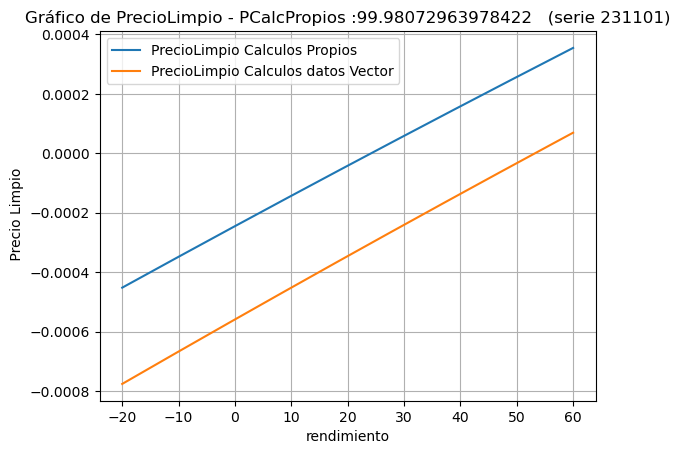

In [68]:
import numpy as np
import matplotlib.pyplot as plt

num_serie = 231101 #np.random.choice(series()) #250416 ,  231101
infoBono = cargarInfoBono(num_serie)
BonoEnEvaluacion = LD_BondesD(infoBono)

#Valores vector: 
rvector = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 
TCdev_Vec = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
Idev_Vec = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
d_Vec = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
K_Vec = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']

#  calculos propios:
#TCdev e Idev usando Tabla fondeo (ri):
Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)
TCdev_Calc = calcTCdev(tabla_ri)
d_Calc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
Idev_Calc = calcInteres(TCdev_Calc,d_Calc,VN) 
K_Calc = BonoEnEvaluacion.Num_cupones_por_liquidar()

PCalcPropios= calcPrecioLimpio(rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)
PcalcVector= calcPrecioLimpio(rvector,s,TCdev_Vec,Idev_Vec,d_Vec,K_Vec,VN,FrecCpn) 

X_r = np.arange(-20, 60, 0.01)
# Importante: si calculas con valores propios tienes que restar el precio calculado con valores propios  
Y1_PCalcPropios = [calcPrecioLimpio(x,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn) - PrecioLimpioVector  for x in X_r]

# Importante: si calculas con valores del vector tienes que restar el precio calculado con valores vector  
Y2_PcalcVector =  [calcPrecioLimpio(x,s,TCdev_Vec,Idev_Vec,d_Vec,K_Vec,VN,FrecCpn) - PrecioLimpioVector for x in X_r]

r1_grafica = X_r[min(enumerate(Y1_PCalcPropios), key=lambda x: abs(x[1]))[0]] 
r2_grafica = X_r[min(enumerate(Y2_PcalcVector), key=lambda x: abs(x[1]))[0]]   

print(f"rvector:{rvector:.6f},segun grafica es: {r1_grafica:.6f} o {r2_grafica:.6f} (PrecioLimpioVector: {PrecioLimpioVector:.6f} PCalcPropios:{PCalcPropios:.6f}  PcalcVector {PcalcVector:.6f})")

# Configurar el gráfico y las etiquetas
plt.figure()
plt.plot(X_r, Y1_PCalcPropios, label='PrecioLimpio Calculos Propios')
plt.plot(X_r, Y2_PcalcVector , label='PrecioLimpio Calculos datos Vector')
plt.xlabel('rendimiento')
plt.ylabel(' Precio Limpio')
plt.title(f'Gráfico de PrecioLimpio - PCalcPropios :{PCalcPropios}   (serie {num_serie})')
plt.grid()

# Agregar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# SOLUCION FINAL PARA .py

# Me quedo con calculos propios y ajusto con un offset del precio limpio en vector

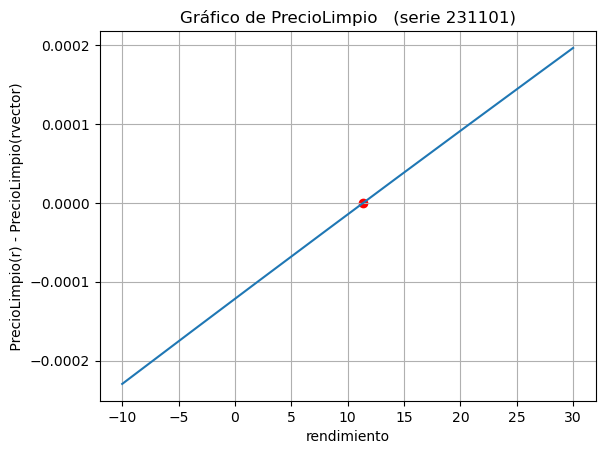

In [75]:
def PrecioLimpioAjustado(r,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn):
    PcalcVector= calcPrecioLimpio(rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)
    ctte = PrecioLimpioVector - PcalcVector
    return calcPrecioLimpio(r,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn) + ctte
    
import numpy as np
import matplotlib.pyplot as plt

num_serie = 231101 #np.random.choice(series()) #250416 ,  231101
infoBono = cargarInfoBono(num_serie)
BonoEnEvaluacion = LD_BondesD(infoBono)

#Valores vector: 
rvector = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 
TCdev_Vec = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
Idev_Vec = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
d_Vec = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
K_Vec = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']

#  calculos propios:
#TCdev e Idev usando Tabla fondeo (ri):
Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)
TCdev_Calc = calcTCdev(tabla_ri)
d_Calc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
Idev_Calc = calcInteres(TCdev_Calc,d_Calc,VN) 
K_Calc = BonoEnEvaluacion.Num_cupones_por_liquidar()

Val_PrecioLimpio = PrecioLimpioAjustado(rvector,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)

X_r = np.arange(-10, 30, 0.01)
Y_Precio = [PrecioLimpioAjustado(x,PrecioLimpioVector,rvector,s,TCdev_Vec,Idev_Vec,d_Vec,K_Vec,VN,FrecCpn) - PrecioLimpioVector  for x in X_r]

plt.figure()
plt.plot(X_r, Y_Precio, label='PrecioLimpio')
plt.scatter([rvector], [PrecioLimpioVector - Val_PrecioLimpio], c='red', marker='o', label='PrecioLimpioVector Vs RendimientoVector')
plt.xlabel('rendimiento')
plt.ylabel(' PrecioLimpio(r) - PrecioLimpio(rvector) ')
plt.title(f'Gráfico de PrecioLimpio   (serie {num_serie})')
plt.grid()

99.914296 99.914296 11.383999


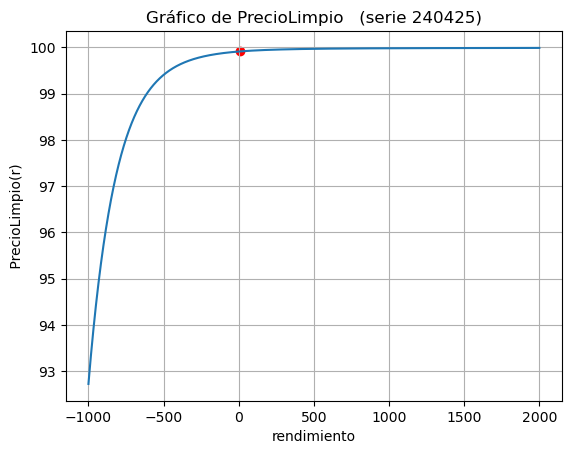

In [97]:
num_serie = 240425 #231101 #np.random.choice(series()) #250416 ,  231101
infoBono = cargarInfoBono(num_serie)
BonoEnEvaluacion = LD_BondesD(infoBono)

#Valores vector: 
rvector = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 
TCdev_Vec = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
Idev_Vec = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
d_Vec = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
K_Vec = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']

#  calculos propios:
#TCdev e Idev usando Tabla fondeo (ri):
Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)
TCdev_Calc = calcTCdev(tabla_ri)
d_Calc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
Idev_Calc = calcInteres(TCdev_Calc,d_Calc,VN) 
K_Calc = BonoEnEvaluacion.Num_cupones_por_liquidar()


Val_PrecioLimpio = PrecioLimpioAjustado(rvector,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)
print(Val_PrecioLimpio, PrecioLimpioVector,rvector )
X_r = np.arange(-1000, 2000, 0.01)
Y_Precio = [PrecioLimpioAjustado(x,PrecioLimpioVector,rvector,s,TCdev_Vec,Idev_Vec,d_Vec,K_Vec,VN,FrecCpn) for x in X_r]
plt.figure()
plt.plot(X_r, Y_Precio, label='PrecioLimpio')
plt.scatter([rvector], [PrecioLimpioVector], c='red', marker='o', label='PrecioLimpioVector Vs RendimientoVector')
plt.xlabel('rendimiento')
plt.ylabel(' PrecioLimpio(r) ')
plt.title(f'Gráfico de PrecioLimpio   (serie {num_serie})')
plt.grid()
plt.show()

# Calculo de rendimiento

In [104]:
def calcRendimientoBisecc(P,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn,rev=False):
    """
    Calcula la tasa de rendimiento dado el Precio Limpio, utilizando la funcion de precio limpio
    PrecioLimpioAjustado(r,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn) y el metodo numerico de biseccion. 
    Entradas:
        - P (float): Valor precio limpio en pesos MXN.
        - s (float): Sobretasa expresada en porciento[%] con redondeo dos decimales. En vector 'Sobretasa'
        - TCdev (float): Tasa de interés anual devengada, expresada en porciento[% ]con redondeo dos decimales. En vector 'CuponActual'
        - Idev (float) : Interes devengado en el periodo d. 
        - d (int): Número de días transcurridos del cupón vigente, vector 'DiasTranscCpn'
        - K (int): Número de cupones por liquidar, incluyendo el vigente, vector 'CuponesCobrar'
        - VN (int): Valor nominal del bono. Valor por defecto: 100. Vector: 'ValorNominal'
        - FrecCpn (int): Número de días en cada período de cupón.  Vector: 'FrecCpn'
        
    Salida:
        r (float): Rendimiento anual esperado por el inversionista expresada en porciento[%]. En vector'TasaDeRendimiento'
    """
    # Precisión deseada para la convergencia
    precision = 1e-6
    # Límites iniciales para la bisección
    a = -10000
    b = 10000
    def objetivo(x):
        return  PrecioLimpioAjustado(x,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn) - P

    # Bisección
    while (b - a) / 2 > precision:
        c = (a + b) / 2
        
        if rev:
            print(c, PrecioLimpioAjustado(c,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn),(b - a) / 2, objetivo(c),P)
            
        if objetivo(c) == 0:
            break
        if objetivo(c) * objetivo(a) < 0:
            b = c
        else:
            a = c
    tasa_rendimiento = (a + b) / 2
    return tasa_rendimiento

print("Rendimiento utilizando datos vector y el metodo biseccion")
for num_serie in series():
    infoBono = cargarInfoBono(num_serie)
    BonoEnEvaluacion = LD_BondesD(infoBono)


    #Valores vector: 
    rvector = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
    s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
    VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
    FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 
    TCdev_Vec = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
    Idev_Vec = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
    d_Vec = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
    K_Vec = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
    FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
    PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']

    #  calculos propios:
    #TCdev e Idev usando Tabla fondeo (ri):
    Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
    tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)
    TCdev_Calc = calcTCdev(tabla_ri)
    d_Calc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
    Idev_Calc = calcInteres(TCdev_Calc,d_Calc,VN) 
    K_Calc = BonoEnEvaluacion.Num_cupones_por_liquidar()

    #calculos
    P_calculado = PrecioLimpioAjustado(rvector,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)
    r_calculado =  calcRendimientoBisecc(PrecioLimpioVector,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)

    print(f"Serie:{num_serie},vector = [ rvect = {rvector:.6f}, Pvect = {PrecioLimpioVector:.7f}], calc = [rcalc= {r_calculado:.6f} , Pcacl = {P_calculado:.7f} ]")


Rendimiento utilizando datos vector y el metodo biseccion
Serie:231005,vector = [ rvect = 11.348996, Pvect = 99.9903830], calc = [rcalc= 11.348996 , Pcacl = 99.9903830 ]
Serie:231101,vector = [ rvect = 11.362502, Pvect = 99.9808590], calc = [rcalc= 11.362503 , Pcacl = 99.9808590 ]
Serie:231207,vector = [ rvect = 11.372498, Pvect = 99.9670200], calc = [rcalc= 11.372498 , Pcacl = 99.9670200 ]
Serie:231221,vector = [ rvect = 11.379699, Pvect = 99.9601940], calc = [rcalc= 11.379700 , Pcacl = 99.9601940 ]
Serie:240201,vector = [ rvect = 11.380999, Pvect = 99.9450700], calc = [rcalc= 11.380999 , Pcacl = 99.9450700 ]
Serie:240229,vector = [ rvect = 11.382000, Pvect = 99.9348750], calc = [rcalc= 11.382000 , Pcacl = 99.9348750 ]
Serie:240404,vector = [ rvect = 11.383000, Pvect = 99.9221950], calc = [rcalc= 11.383000 , Pcacl = 99.9221950 ]
Serie:240425,vector = [ rvect = 11.383999, Pvect = 99.9142960], calc = [rcalc= 11.383999 , Pcacl = 99.9142960 ]
Serie:240530,vector = [ rvect = 11.388001, Pve

In [105]:
num_serie = 260611
infoBono = cargarInfoBono(num_serie)
BonoEnEvaluacion = LD_BondesD(infoBono)

#Valores vector: 
rvector = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 
TCdev_Vec = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
Idev_Vec = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
d_Vec = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
K_Vec = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']

#  calculos propios:
#TCdev e Idev usando Tabla fondeo (ri):
Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)
TCdev_Calc = calcTCdev(tabla_ri)
d_Calc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
Idev_Calc = calcInteres(TCdev_Calc,d_Calc,VN) 
K_Calc = BonoEnEvaluacion.Num_cupones_por_liquidar()


#calculo
desviacion = 0.9999

r_calculado =  calcRendimientoBisecc(PrecioLimpioVector*desviacion,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn,True)

print(f"Serie:{num_serie},vector = [ rvect = {rvector:.6f}, Pvect = {PrecioLimpioVector:.7f}]")
print(f"Para un precioLimpio: {PrecioLimpioVector*desviacion} se espera un rendimiento de {r_calculado}")

0.0 99.43667983871282 10000.0 -0.06968252988717438 99.5063623686
5000.0 99.98964984538043 5000.0 0.4832874767804327 99.5063623686
2500.0 99.98434560036947 2500.0 0.4779832317694712 99.5063623686
1250.0 99.9757230665862 1250.0 0.46936069798620395 99.5063623686
625.0 99.95946597131264 625.0 0.4531036027126447 99.5063623686
312.5 99.92740378664624 312.5 0.4210414180462436 99.5063623686
156.25 99.86515484573759 156.25 0.3587924771375981 99.5063623686
78.125 99.76497317654601 78.125 0.2586108079460132 99.5063623686
39.0625 99.65299384553043 39.0625 0.14663147693043754 99.5063623686
19.53125 99.56336257215989 19.53125 0.05700020355989466 99.5063623686
9.765625 99.50561823437742 9.765625 -0.0007441342225718017 99.5063623686
14.6484375 99.53575264990077 4.8828125 0.029390281300777588 99.5063623686
12.20703125 99.52101698269263 2.44140625 0.014654614092634688 99.5063623686
10.986328125 99.51340258633647 1.220703125 0.007040217736474119 99.5063623686
10.3759765625 99.50953192260086 0.6103515625 

## Grafica rendimiento (Biseccion) en funcion del PrecioLimpio 

Serie:240425,vector = [ rvect = 11.3840, Pvect = 99.9142960], calc = [rcalc= 11.3840 , Pcacl = 99.9142960 ]
desde (99.86433885199999, -133.3427260397002) hasta (99.964253148, 397.54534664098173) 


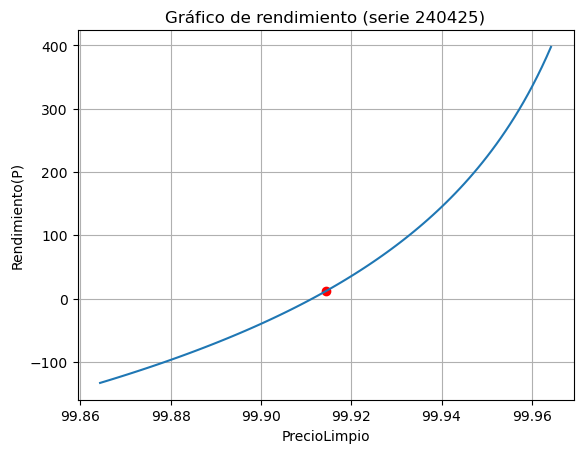

In [121]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

num_serie = 240425 #231101 #np.random.choice(series())
infoBono = cargarInfoBono(num_serie)
BonoEnEvaluacion = LD_BondesD(infoBono)

#Valores vector: 
rvector = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
FrecCpn = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 
TCdev_Vec = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
Idev_Vec = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
d_Vec = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
K_Vec = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
FechaInteres =  BonoEnEvaluacion.verInfoBono()['TimId']
PrecioLimpioVector = BonoEnEvaluacion.verInfoBono()['PrecioLimpio']

#  calculos propios:
#TCdev e Idev usando Tabla fondeo (ri):
Fechas = BonoEnEvaluacion.calcular_fechas_ultimo_cupon() 
tabla_ri = hallar_tabla_ri_fechas(Fechas, df_tabla_ri,FechaInteres,FrecCpn)
TCdev_Calc = calcTCdev(tabla_ri)
d_Calc = BonoEnEvaluacion.calcular_dias_ultimo_cupon()
Idev_Calc = calcInteres(TCdev_Calc,d_Calc,VN) 
K_Calc = BonoEnEvaluacion.Num_cupones_por_liquidar()

#calculos
P_calculado = PrecioLimpioAjustado(rvector,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)
r_calculado =  calcRendimientoBisecc(PrecioLimpioVector,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn)

print(f"Serie:{num_serie},vector = [ rvect = {rvector:.4f}, Pvect = {PrecioLimpioVector:.7f}], calc = [rcalc= {r_calculado:.4f} , Pcacl = {P_calculado:.7f} ]")

def generar_x(val, n, porcentaje):
    min_valor = val - porcentaje * val
    max_valor = val + porcentaje * val
    valores = np.linspace(min_valor, max_valor, n)
    return valores.tolist()

X_P =generar_x(P_calculado, 100, .0005)
Y_rendimiento = [calcRendimientoBisecc(P,PrecioLimpioVector,rvector,s,TCdev_Calc,Idev_Calc,d_Calc,K_Calc,VN,FrecCpn) for P in X_P]
print( f"desde ({X_P[0]}, {Y_rendimiento[0]}) hasta ({X_P[-1]}, {Y_rendimiento[-1]}) ")


# Configurar el gráfico y las etiquetas
plt.figure()
plt.plot(X_P,Y_rendimiento , label='Rendimiento')
plt.scatter([PrecioLimpioVector], [rvector], c='red', marker='o', label='Vector')
plt.grid()
plt.xlabel('PrecioLimpio')
plt.ylabel('Rendimiento(P)')
plt.title(f'Gráfico de rendimiento (serie {num_serie})')
plt.show()


In [200]:
from scipy.optimize import newton

def calcRendimientoNewton(PrecioLimpio, s, TCdev, Idev, d, K, VN, Nj):
    """
    Calcula la tasa de rendimiento dado el Precio Limpio utilizando el método de Newton.

    Entradas:
        - PrecioLimpio (float): Valor precio limpio en pesos MXN.
        - s (float): Sobretasa expresada en porciento[%] con redondeo dos decimales.
        - TCdev (float): Tasa de interés anual devengada, expresada en porciento[%] con redondeo dos decimales.
        - Idev (float): Interés devengado en el período d.
        - d (int): Número de días transcurridos del cupón vigente.
        - K (int): Número de cupones por liquidar, incluyendo el vigente.
        - VN (int): Valor nominal del bono.
        - Nj (int): Número de días en cada período de cupón.

    Salida:
        r (float): Rendimiento anual esperado por el inversionista expresado en porciento[%].
    """

    def objetivo(r):
        return calcPrecioLimpio(r, s, TCdev, Idev, d, K, VN, Nj) - PrecioLimpio

    # Suponemos siempre una tasa inicial del 10%
    tasa_rendimiento = newton(objetivo, 0.1)

    return tasa_rendimiento


print("Rendimiento utilizando Newton y la informacion del vector para calcular el preciolimpio (NO el precio limpio del vector)")
for num_serie in series():
    infoBono = cargarInfoBono(num_serie)
    BonoEnEvaluacion = LD_BondesD(infoBono)
    
    #Valores vector: 
    s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
    TCdev = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
    Idev = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
    d = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
    K = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
    VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
    Nj = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 
    
    rvector = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
    PrecioLimpiocalc = calcPrecioLimpio(rvector,s,TCdev,Idev,d,K,VN,Nj)
    
    rcalc = calcRendimientoNewton(PrecioLimpiocalc,s,TCdev,Idev,d,K,VN,Nj)
    
    r = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
    
    print(f"Serie:{num_serie} => rcalc = {rcalc:.6f}, rvect = {r:.6f},  Error% = {(r-rcalc)/r*100:.4f}")

Rendimiento utilizando Newton y la informacion del vector para calcular el preciolimpio (NO el precio limpio del vector)
Serie:231005 => rcalc = 11.348996, rvect = 11.348996,  Error% = 0.0000
Serie:231101 => rcalc = 11.362502, rvect = 11.362502,  Error% = -0.0000
Serie:231207 => rcalc = 11.372498, rvect = 11.372498,  Error% = -0.0000
Serie:231221 => rcalc = 11.379699, rvect = 11.379699,  Error% = 0.0000
Serie:240201 => rcalc = 11.380999, rvect = 11.380999,  Error% = -0.0000
Serie:240229 => rcalc = 11.382000, rvect = 11.382000,  Error% = 0.0000
Serie:240404 => rcalc = 11.383000, rvect = 11.383000,  Error% = 0.0000
Serie:240425 => rcalc = 11.383999, rvect = 11.383999,  Error% = -0.0000
Serie:240530 => rcalc = 11.388001, rvect = 11.388001,  Error% = 0.0000
Serie:240627 => rcalc = 11.387500, rvect = 11.387500,  Error% = 0.0000
Serie:240801 => rcalc = 11.390000, rvect = 11.390000,  Error% = -0.0000
Serie:240822 => rcalc = 11.391000, rvect = 11.391000,  Error% = -0.0000
Serie:241024 => rcalc

## Grafica rendimiento (newton) en funcion del PrecioLimpio 

In [184]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

num_serie = np.random.choice(series())
infoBono = cargarInfoBono(num_serie)
BonoEnEvaluacion = LD_BondesD(infoBono)

s = BonoEnEvaluacion.verInfoBono()['Sobretasa'] 
TCdev = BonoEnEvaluacion.verInfoBono()['CuponActual'] 
Idev = BonoEnEvaluacion.verInfoBono()['InteresesAcumulados'] 
d = BonoEnEvaluacion.verInfoBono()['DiasTranscCpn'] 
K = BonoEnEvaluacion.verInfoBono()['CuponesCobrar'] 
VN = BonoEnEvaluacion.verInfoBono()['ValorNominal'] 
Nj = BonoEnEvaluacion.verInfoBono()['FrecCpn'] 

rvector = BonoEnEvaluacion.verInfoBono()['TasaDeRendimiento']
PrecioLimpiocalc = calcPrecioLimpio(rvector,s,TCdev,Idev,d,K,VN,Nj)
print(f"Serie:{num_serie}, PrecioLimpiocalc:{PrecioLimpiocalc:.6f}, rVector:{rvector}, fechaInt = {str(fechaInt)}, s:{s:.3f},  TCdev:{TCdev:.2f}, Idev:{Idev:.6f} d:{d}, K:{K}")

def generar_x(val, n, porcentaje):
    min_valor = val - porcentaje * val
    max_valor = val + porcentaje * val
    valores = np.linspace(min_valor, max_valor, n)
    return valores.tolist()

@interact
def variacionPrecio(valor = (.00005,0.001,0.00005)):
    procentajeVariacion =  valor
    X_P = generar_x(PrecioLimpiocalc,100,procentajeVariacion)
    Y_rendimiento = [calcRendimientoNewton(P, s, TCdev, Idev, d, K, VN, Nj)  for P in X_P]

    print(f"Desde (P={X_P[0]:.6f},r={Y_rendimiento[0]:.3f})  hasta  (P={X_P[-1]:.6f},r={Y_rendimiento[-1]:.3f})")
    
    # Configurar el gráfico y las etiquetas
    plt.figure()
    plt.plot(X_P,Y_rendimiento , label='Rendimiento')
    plt.xlabel('PrecioLimpio')
    plt.ylabel('rendimiento')
    plt.title(f'Gráfico de rendimiento a variaciones ({procentajeVariacion*100}%) del precio limpio , serie {num_serie}')
    plt.grid()

    # Agregar la leyenda
    plt.legend()

    # Habilitar la interacción con la gráfica
    mplcursors.cursor(hover=True)
    
    # Mostrar el gráfico
    plt.show()
    
    # 231005 No ok
    # 240822, 260622 ok

Serie:240201, PrecioLimpiocalc:99.945083, rVector:11.380999, fechaInt = 2023-08-31, s:0.131,  TCdev:11.26, Idev:0.437889 d:14, K:6


interactive(children=(FloatSlider(value=0.0005, description='valor', max=0.001, min=5e-05, step=5e-05), Output…